# 주제 : 붗꽃품종탐구
# 목적 : 시험
# 제출처 : 비트캠프

# 붓꽃품종분류기

- 꽃받침(Sepal), 꽃잎(Petal) 각각의 길이와 폭을 이용하여붓꽃의 품종을 출력하여라 

In [3]:
Image(url='https://t1.daumcdn.net/cfile/tistory/996F6F445AF85F1E27')

In [6]:
Image(url='https://t1.daumcdn.net/cfile/tistory/99CB703A5AF85F1F2C')

In [143]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [144]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 머신러닝 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

In [145]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [146]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이타 수집 

- input/iris.csv

In [147]:
from sklearn import datasets
iris = datasets.load_iris()

In [148]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [149]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [150]:
print("데이터 셋 크기:", iris['target'].shape)

print("데이터 셋 내용:\n",iris['target'])

#data 속성을 판다스 데이터 프레임으로 변환
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print("데이터프래임의 형태", df.shape)
df.head()




데이터 셋 크기: (150,)
데이터 셋 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
데이터프래임의 형태 (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [151]:
#  열 이름을 간결히 변경
df.columns = ['sepal_length', 'sepal_width','petal_leng','petal_width']
df.head(2)



,sepal_length,sepal_width,petal_leng,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [152]:
# Target 열추가
df['Target'] = iris['target']
print('데이터셋의 크기:', df.shape)
df.head()

데이터셋의 크기: (150, 5)


,sepal_length,sepal_width,petal_leng,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



# 데이타 전처리 

In [153]:
#데이터 프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_leng      150 non-null float64
petal_width     150 non-null float64
Target          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [154]:
#통계정보요약
df.describe()

,sepal_length,sepal_width,petal_leng,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [155]:
#결측값확인
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_leng      0
petal_width     0
Target          0
dtype: int64

In [156]:
#중복데이터확인
df.duplicated().sum()

3

In [157]:
#중복 데이터 출력
df.loc[df.duplicated(),:]

,sepal_length,sepal_width,petal_leng,petal_width,Target
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [158]:
#중복 데이터 모두출력
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]


,sepal_length,sepal_width,petal_leng,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [159]:
#중복데이터 제거
df= df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,petal_leng,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [160]:
#변수간의 상관관계분석
df.corr()

,sepal_length,sepal_width,petal_leng,petal_width,Target
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_leng,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
Target,0.782904,-0.418348,0.948339,0.955693,1.000000


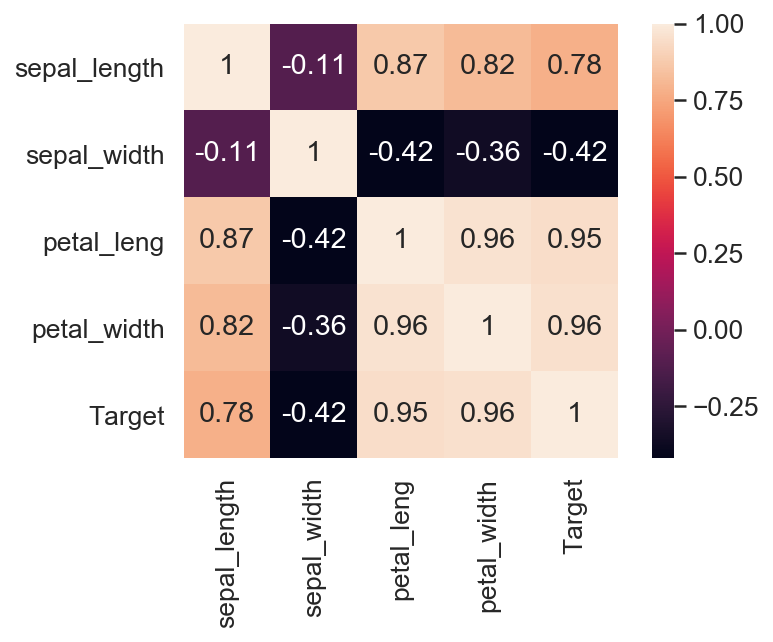

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# 데이터 시각화 상관계수 히트맵
sns.heatmap(data=df.corr(),square=True, annot=True, cbar=True)
plt.show()

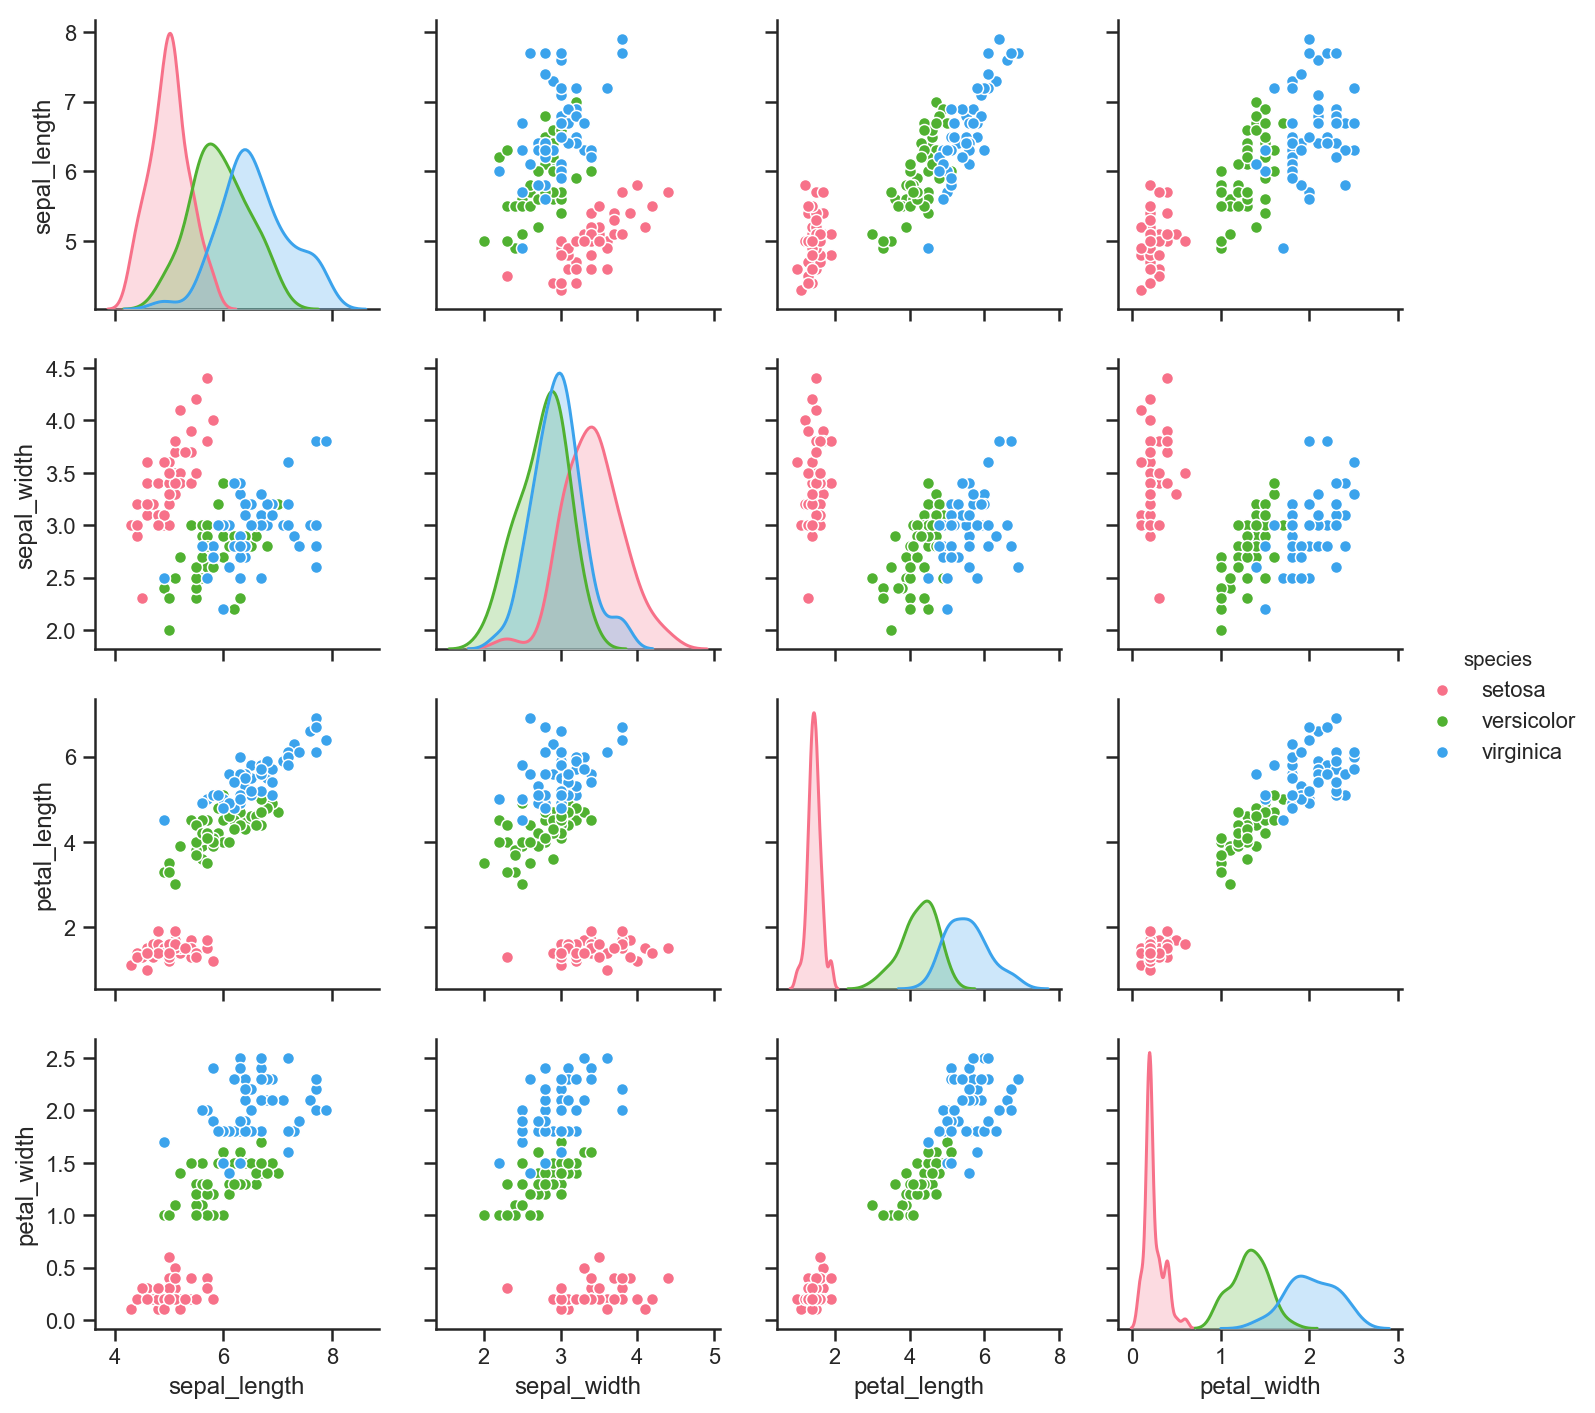

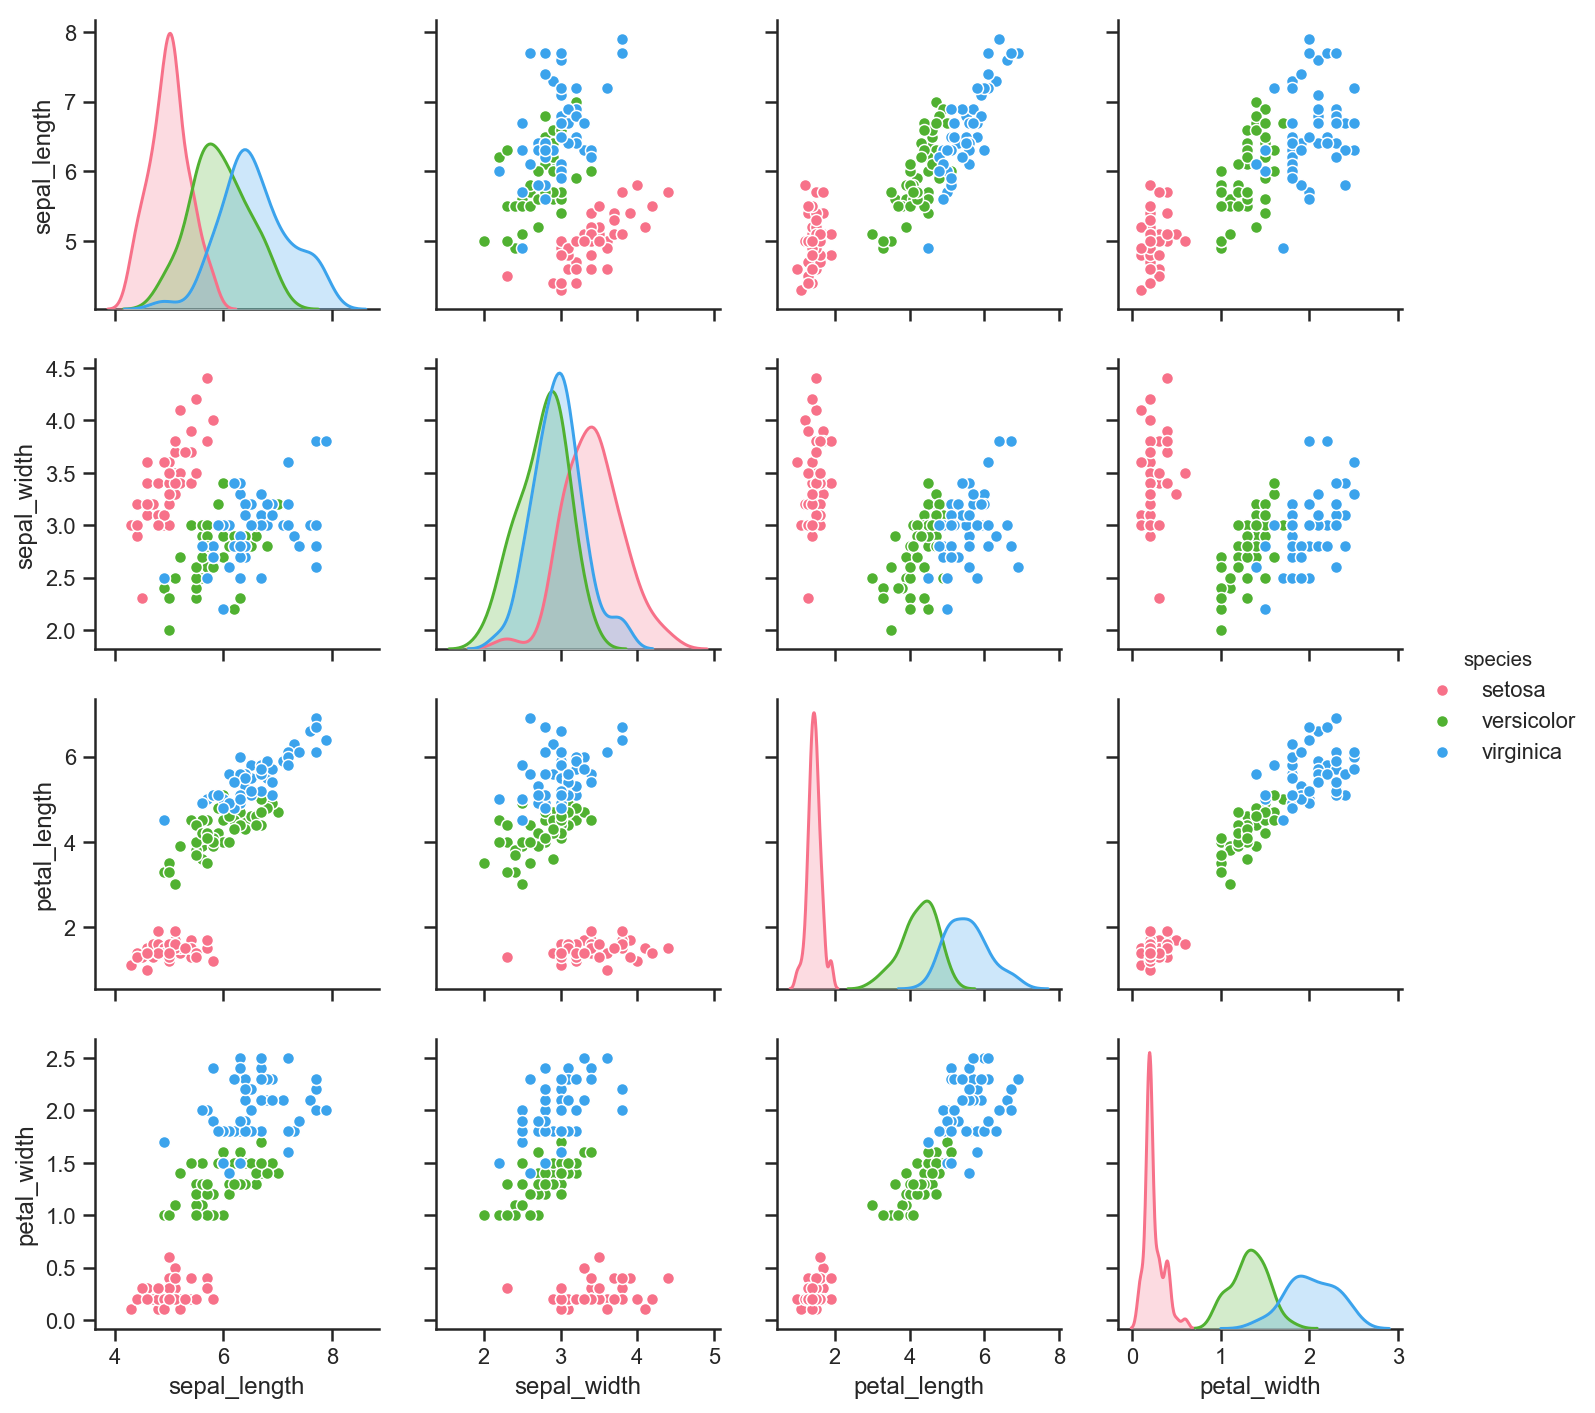

In [162]:

#데이터 시각화

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species",palette = "husl")

sns.pairplot(iris, hue="species",palette = "husl")



### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [163]:
from sklearn.model_selection import train_test_split

x_data = df.loc[:,'sepal_length':'petal_width']
y_data = df.loc[:,'Target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(117, 4) (117,)
(30, 4) (30,)


### 데이타 학습  : 모델링

In [164]:
#모델학습

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### 데이터 예측 

In [165]:
#예측
y_knn_pred = knn.predict(x_test)
print("예측값:",y_knn_pred[:5])

예측값: [2 0 1 1 2]


### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [167]:
#성능평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy:%.4f"% knn_acc)

Accuracy:1.0000
